In [1]:
#%load_ext autoreload
#%autoreload 2

#import sys
#print(sys.path)
import wishbone

# Plotting and miscellaneous imports
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
#%%prun
####  THIS CELL CLEARS THE STATE  ####
#%load_ext line_profiler
#%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%reset -f
#%reload_ext autotime
%reload_ext autoreload
%autoreload 2
%matplotlib notebook
#%load_ext memory_profiler

from imports import *
run.init(
    samples = WaG_good + FrK_good, #SchH_good + 
    experiment = 'test',
    notebook = 'bioviz-test.ipynb',
    input_files = { 'expression_matrix': "expressions.tsv" },
    nrows = 0,
    #features = [10, 'important', 'all'],
    features = [ 'all' ],
    diffexprs = ['wilcox'], # 'ks'
    interactive = False,
    run = {
           'stats': True,
           #'vb_distr':      1
           'filt_cells': {
               'cells': '(cells_in_well == 1)',
               'expressed_genes': 0,
           },
           'filt_genes': {
               'expression_threshold': 0,
               'min_cells_expressing_gene': 1,
           },
           'dump_clonality_tables': True,
           #'filt': {'cells': '(cells_in_well == 1) & (mapped > 500K)'},
           #'normalize': 'byTotalSum', # 'bySpikeIn'
           #'combine_batches': ['patient'],   # ['patient', 'pairs', 'all'],
           #'scatter': { 'dim_reduct': ['PCA'],     # 't-SNE', 'MDS', "ZIFA"
           #             'coloring': ['byClone'],
           #             'coloring': ['bySample', 'byClone', 'bySampleAndClone'],
           #           },
           #'classifier':    0,
        
        #   'geneintersect': True,
           #'quantheatmap':  {'coloring': ['byClone']},
        
           #'quantheatmap':  {'coloring': ['bySample', 'byClone', 'bySampleAndClone']},
           #'bipartite':     ['clonal', 'sample', 'rainbow'],
           #'bipartite':     ['clonal'],      # ['clonal', 'sample', 'rainbow'],
#           'gsea': {'geneset': 'human_all_collections_lymphocytes_sept2017.gmt'},
           #'gsea': {'geneset': 'c1.all.v6.0.symbols.gmt'}, # 'gseaftp.broadinstitute.org://pub/gsea/gene_sets_final/c5.cc.v3.1.symbols.gmt'},
    },
    kernels = ['decision-tree', 'log-linear', 'rbf'],   # ['linear', 'lin', 'poly', 'rbf'],
    Cs = [1], gammas = [1],
    #Cs = [1e-10, 1e-5, 1e0, 1e5, 1e10], gammas = [1e-10, 1e-5, 1e0, 1e5, 1e10] 
)

Output dir: /home/pesho/repos/bioviz/out/20180125_10h25m04s_batches.WaGSE+WaGBLC+FrKSE+FrKSL+FrKBL_DE.wilcox_filt.(cells_in_well1)_experiment.test
 -----------------------------
Loading batch WaG_SE...
Selecting the cells by: (cells_in_well == 1)
WaG_SE (84 cells x 92739 genes)
maximum size of nonclones for WaG_SE is 3/55=5.45% (target: 5.00%)
Pesho: find_clones, process  TRBV20-1_CTAGATCGAGACTAGCGGGCTCCT_TRBJ2-7 
  22 noncl,  32 cl:                                              TRBV20-1_CTAGATCGAGACTAGCGGGCTCCT_TRBJ2-7 --> 1 genes
 -----------------------------
Loading batch WaG_BLC...
Selecting the cells by: (cells_in_well == 1)
WaG_BLC (74 cells x 97913 genes)
maximum size of nonclones for WaG_BLC is 3/54=5.56% (target: 5.00%)
Pesho: find_clones, process  TRBV20-1_CTAGATCGAGACTAGCGGGCTCCT_TRBJ2-7 
  23 noncl,  23 cl:                                              TRBV20-1_CTAGATCGAGACTAGCGGGCTCCT_TRBJ2-7 --> 0 genes
 -----------------------------
Loading batch FrK_SE...
Selecting the c


   ------- [PDF] --------
Make a copy of the notebook...
Collect 5 images and stamp them...
Merge all images to one PDF [stats_20180125_10h25m04s_batches.WaGSE+WaGBLC+FrKSE+FrKSL+FrKBL_DE.wilcox_filt.(cells_in_well1).pdf]...
   ------- [DONE] --------


In [68]:
batch = run.B[('SchH', 'SE')]
cl, noncl, unk, nonrec = batch.get_clonality_subbatches()
cl.quant.to_file('schh_cl.csv')
noncl.quant.to_file('schh_noncl.csv')

Writing to schh_cl.csv
Writing to schh_noncl.csv


In [67]:
print(schh_cl)
batch.cell_part

SchH_SE_clonal: 23 cells



clonal: SchH_SE-103, SchH_SE-106, SchH_SE-113, SchH_SE-115, SchH_SE-118, SchH_SE-122, SchH_SE-125, SchH_SE-134, SchH_SE-136, SchH_SE-137, SchH_SE-141, SchH_SE-145, SchH_SE-146, SchH_SE-156, SchH_SE-161, SchH_SE-164, SchH_SE-176, SchH_SE-177, SchH_SE-178, SchH_SE-180, SchH_SE-182, SchH_SE-185, SchH_SE-97 | nonclonal: SchH_SE-132, SchH_SE-133, SchH_SE-135, SchH_SE-139, SchH_SE-148, SchH_SE-149, SchH_SE-153, SchH_SE-160, SchH_SE-162, SchH_SE-166, SchH_SE-167, SchH_SE-168, SchH_SE-173, SchH_SE-179, SchH_SE-184, SchH_SE-187, SchH_SE-188, SchH_SE-189 | unknown: SchH_SE-144, SchH_SE-154, SchH_SE-159, SchH_SE-175

In [53]:
batch = run.B[('SchH', 'SE')]
data_frame = batch.quant.ge

scdata = wishbone.wb.SCData(data_frame, 'sc-seq')
scdata

SCData: 58 cells x 12305 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=None
metadata=True
normalized=True
pca=None
tsne=None

Target dimensionality reduced to 58.


/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


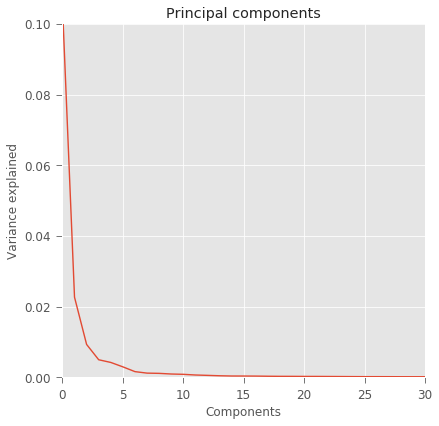

In [54]:
scdata.run_pca()
fig, ax = scdata.plot_pca_variance_explained(ylim=(0, 0.1), n_components=30)

Reducing perplexity to 15 since there are <100 cells in the dataset. 


/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


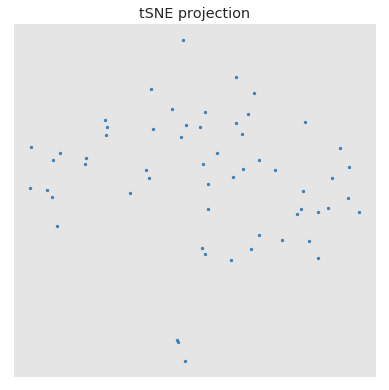

In [55]:
scdata.run_tsne(n_components=5, perplexity=30)
fig, ax = scdata.plot_tsne()

(<matplotlib.figure.Figure at 0x7f2e84844780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e84844898>)

/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


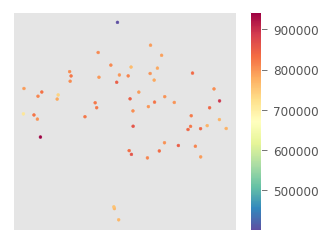

In [56]:
fig = plt.figure(figsize=[5, 4])
scdata.plot_tsne_by_cell_sizes(fig=fig)

['ENST00000535707',
 'ENST00000011653',
 'ENST00000536610',
 'ENST00000544344',
 'ENST00000541982',
 'ENST00000538827',
 'ENST00000437800',
 'ENST00000535466',
 'ENST00000536590',
 'ENST00000539492',
 'ENST00000536563',
 'ENST00000543755']

The following genes were either not observed in the experiment, or the wrong gene symbol was used: {'ENST00000538827', 'ENST00000536563', 'ENST00000544344', 'ENST00000535466', 'ENST00000536610', 'ENST00000437800', 'ENST00000535707', 'ENST00000541982', 'ENST00000539492', 'ENST00000536590', 'ENST00000543755'}


/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


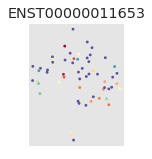

In [58]:
#genes = ['CD34', 'GATA2', 'GATA1', 'MPO'] 
genes = ['CD4'] 
transcript_ids = [ gene_db.gname2tids(g) for g in genes if g is not 'NO_NAME' ]
flatten_ids = [ tid for tids in transcript_ids for tid in tids ]
display(flatten_ids)
columns = scdata._data.columns
[ tid in columns for tid in flatten_ids ]
fig, ax = scdata.plot_gene_expression(genes = flatten_ids)

/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


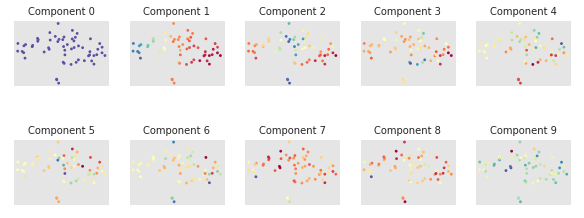

In [59]:
scdata.run_diffusion_map()
fig, ax = scdata.plot_diffusion_components()

/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


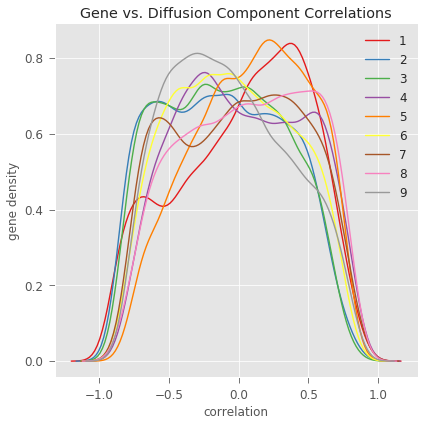

In [60]:
scdata.run_diffusion_map_correlations()
fig, ax = scdata.plot_gene_component_correlations()

## Tutorial

In [39]:
scdata_tut = wishbone.wb.SCData.from_csv(os.path.expanduser('~/.wishbone/data/sample_scseq_data.csv'), 
                data_type='sc-seq', normalize=True)

In [42]:
scdata_tut._data.index

Index(['W29956', 'W30018', 'W30161', 'W30203', 'W30258', 'W30296', 'W30301',
       'W30306', 'W31106', 'W31108',
       ...
       'W76151', 'W76159', 'W76160', 'W76170', 'W76185', 'W76187', 'W76226',
       'W76255', 'W76282', 'W76331'],
      dtype='object', length=4423)

In [43]:
scdata_tut

SCData: 4423 cells x 2312 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=True
metadata=True
normalized=True
pca=None
tsne=None

/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


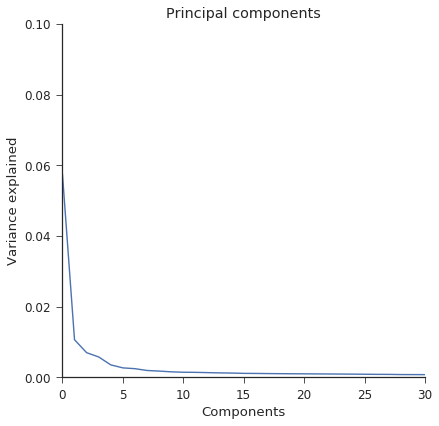

In [13]:
fig, ax = scdata.plot_pca_variance_explained(ylim=(0, 0.1), n_components=30)

In [14]:
scdata.run_tsne(n_components=5, perplexity=30)

/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


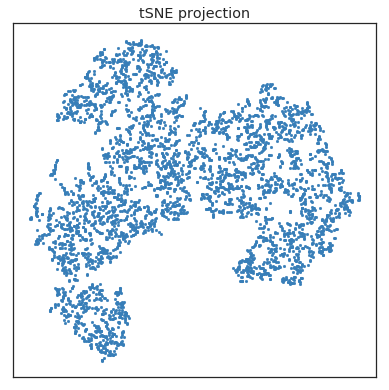

In [15]:
fig, ax = scdata.plot_tsne()

(<matplotlib.figure.Figure at 0x7f6c1fccf160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6c1fccf400>)

/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


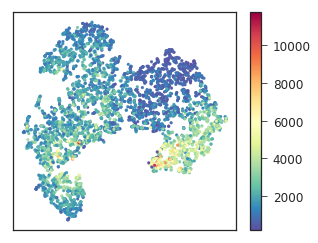

In [16]:
fig = plt.figure(figsize=[5, 4])
scdata.plot_tsne_by_cell_sizes(fig=fig)

/home/pesho/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


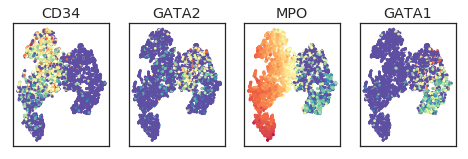

In [17]:
fig, ax = scdata.plot_gene_expression(genes = ['CD34', 'GATA2', 'GATA1', 'MPO'])